# Membuat dan melatih model untuk klasifikasi banyak kelas

membuat jaringan saraf tiruan untuk mengklasifikasikan dataset iris

Pertama-tama kita upload dataset iris

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


Import library yang akan kita butuhkan untuk membangun jaringan saraf tiruan

In [3]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

Menggunakan fungsi read_csv() untuk mengubah dataset menjadi dataframe

In [4]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


setelah mengubah dan menampilkan dataframe kita bisa memulai menghapus kolom yang tidak diperlukan. Untuk membuang kolom dari dataframe bisa menggunakan fungsi drop()

In [5]:
df = df.drop(columns='Id')

Kita perlu melakukan one hot encoding karena label kita merupakan data kategorikal. Fungsi get_dummies() dapat memudahkan kita

In [6]:
category = pd.get_dummies(df.Species)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


Kita juga perlu menggabungkan kolom hasil one hot encoding dan membuang kolom spesies karena kolom tersebut tidak digunakan

In [7]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


Setelah dataframe sudah diolah, konversi dataframe menjadi numpy array dengan fungsi values dari dataframe

In [8]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

Setelah berhasil mengkonversi menjadi array kita pisahkan antara atribut dan label

In [9]:
# Pilih 4 kolom pertama untuk dijadikan sebagai atribut
x = dataset[:,0:4]
# Pilih 3 kolom terakhir sebagai label
y = dataset[:,4:7]

Kita perlu menormalisasi data agar data dapat dipelajari oleh jaringan saraf tiruan

In [10]:
# Normalize
min_max_scaler = preprocessing.MinMaxScaler()
x_scale = min_max_scaler.fit_transform(x)
x_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

bagi data menjadi data latih dan data uji. Untuk data latih akan sebesar 30%

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(x_scale, y, test_size=0.3)

Untuk arsitektur model akan menggunakan 3 buah layer. Activation function yang digunakan pada layer terakhir softmax karena activation tersebut umum dipakai untuk klasifikasi multi kelas seperti ini

In [12]:
model = Sequential([
                    Dense(64, activation='relu', input_shape=(4,)),
                    Dense(64, activation='relu'),
                    Dense(3, activation='softmax')
])

Kemudian menentukan optimizer dan loss function dari model. Untuk masalah multi kelas, kita bisa menggunakan loss 'categorical_crossentropy'

In [13]:
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

kemudian kita masukan fungsi fit() kedalam variabel hist yang nantinya akan berguna untuk visualisasi data

In [14]:
hist = model.fit(X_train, Y_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 14s 5ms/step - loss: 1.1047 - accuracy: 0.3090
Epoch 2/200
4/4 [==============================] - 0s 4ms/step - loss: 1.0717 - accuracy: 0.5813
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 1.0387 - accuracy: 0.6941
Epoch 4/200
4/4 [==============================] - 0s 3ms/step - loss: 1.0151 - accuracy: 0.6847
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9896 - accuracy: 0.6910
Epoch 6/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9671 - accuracy: 0.6670
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9429 - accuracy: 0.6618
Epoch 8/200
4/4 [==============================] - 0s 3ms/step - loss: 0.9070 - accuracy: 0.6857
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8703 - accuracy: 0.6962
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8511 - accuracy: 0.6639
Epoch 11/200
4/4 [==========

Kemudian kita bisa menguji akurasi prediksi model

In [15]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 1s 9ms/step - loss: 0.0927 - accuracy: 0.9556


[0.09271174669265747, 0.9555555582046509]

Mengimport library matplotlib untuk visualisasi data

In [16]:
import matplotlib.pyplot as plt

Objek pyplot akan melakukan plot dari objek variabel hist. Objek hist menampung informasi dari akurasi dan loss model pada setiap epoch di proses pelatihan. Sehingga kita bisa membuat plot akurasi atau loss dari model

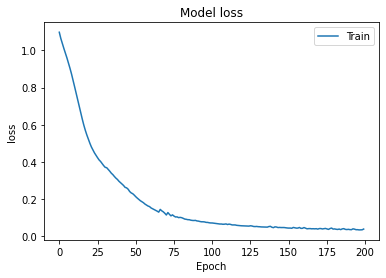

In [18]:
plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

Bisa kita lihat loss semakin menurun ketika mendekati epoch 200. Untuk membuat plot dari akurasi kita bisa memilih metrik accuracy pada fungsi history

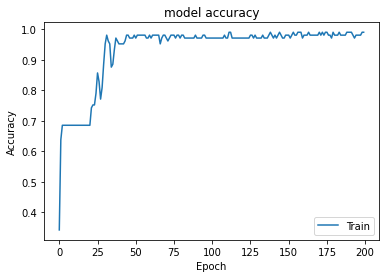

In [19]:
plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()

Dan bisa kita lihat juga bahwa akurasi semakin meningkat ketika epoch semakin besar